# Introduction

(maybe a better introduction)
(Add the visualization software and team formation)
(how the responders are given the task to create survey to find certain information about their class)

The basic idea behind the survey is to find out which is graph gives the most accuracy in a certain amount of time.
To make questions, we followed the general structure provided by Dr.Bowen and the student(s) who worked on this project before us.

General Structure:
- Basic interpretability
    - We asked a simple question to test if the responder understands the graph.
- Moving individuals
    - We provided a set of graphs which are suppose to be two teams (i.e Team A, Team B) and we asked responder to move a individuals from a team to other team depending on the question.
- Comparing team sets
    - Here we asked the responder to explore at two different scenarios (each scenario contained three different team) and provide a answer based on question. 
- General preference (rank viz choices)
    - In the end, we asked the responder to give their preference on which graph is the best from them and asked for an explaination.
    
We followed this general structure and based on this, Dr.Bowen and us came up with different question in order to test responder's understanding for each graph. The graph were created using Python. We used Qualtrics as a data collection tool and analysis the data collected. The main goal of study is to improve the previous survey/study(?) by replacing the existing graphs with better graphs and improving questionnaires. In analysis section, we will try to find relationship between accuracy and time taken by the responders to complete the questionnaire.

# The Questionnaire

Up till now, we have made use of 5 different graphs:

1. Stack Bar Graph
2. Group Bar Graph
3. Grid View
4. Heat Map
5. Tally

Similar to pervious study, we decided to use stack bar graph and group bar graph to create team based on Student Skills.
(reasoning left)

The student skills are as follow: 

- Website: how good they are at designing websites
- Database: how good they are at writing code for databases
- Communication: good they are with talking to clients and customers
- Time: how good they are with time management

where the Students responded to each skill on a scale from 1 - 5, where 1 means they are bad at that skill, and 5 means they are very proficient at that skill.

Grid View, Heat Map and Tally were used to create team based on Time availability.
(reasoning left)

# Implementing Counterbalancing

As we were working to create the survey and we realized that the survey result might be unfair as we were asking for graphs in a specific order (i.e stack bar graph then group bar graph). As the graphs are different and have their drawbacks. We introduced counterbalancing to make our result fair. We used the Latin square technique for our study where we will **N** no. of the version of our survey for the **N** no. of graphs. For example, if the survey has two types of graphs then there will be two versions. The first version will have graph type 1 then graph type 2 and the second version will have graph type 2 then graph type 1.

(A better explanation for latin square)





### Stack bar graph
<img src ="../visualizations/VizSkills/p13v3s/q1a.png" width="300"/>

### Group bar graph
<img src ="../visualizations/VizSkills/p13v3g/q1a.png" width="300"/>

### For the Latin Square counterbalancing, we created two version of section 1 - Skills. 

### The Version 1 had Group bar graph first then Stacked bar graph
### The Version 2 had Stacked bar graph first then Group bar graph


In [24]:
import pandas as pd
import script as sc
import numpy as np

df = sc.preprocessing('../report/data/section 1/SkillsV1.csv', label=[0,1,2])
df1 = sc.preprocessing('../report/data/section 1/SkillsV2.csv')
display(df)
display(df1)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q187_Last Click,Q187_Page Submit,Q187_Click Count,Q32,Q188_First Click,Q188_Last Click,Q188_Page Submit,Q188_Click Count,Q33,Q34
3,2021-12-06 23:02:22,2021-12-06 23:22:08,IP Address,24.71.96.164,100,1185,True,2021-12-06 23:22:08,R_1hzBCYJYZ1dxOmX,NaN,...,16.571,18.015,1,Scenario 2 is better for my class,84.463,84.463,85.695,1,Grouped Bar Graph is easier to understand,I think the grouped bar graph is more easy to ...
4,2021-12-07 13:55:50,2021-12-07 14:18:55,IP Address,70.36.59.148,100,1385,True,2021-12-07 14:18:56,R_2xV4DjyC8VUfgEc,NaN,...,10.196,12.675,1,I can't tell from graphs,43.489,44.592,49.824,2,Stacked Bar Graph is easier to understand,Stacked was usually easier to interpret quickl...


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q204_Last Click,Q204_Page Submit,Q204_Click Count,Q32,Q205_First Click,Q205_Last Click,Q205_Page Submit,Q205_Click Count,Q33,Q34
2,2021-12-06 22:37:42,2021-12-06 22:48:37,IP Address,24.71.116.181,100,654,True,2021-12-06 22:48:37,R_9TZmFl6GDLX9Dax,NaN,...,3.203,4.268,1,Scenario 1 is better for my class,2.481,2.481,5.098,1,Grouped Bar Graph is easier to understand,it makes it easier to compare and understand w...
3,2021-12-06 23:17:56,2021-12-06 23:37:28,IP Address,174.7.180.147,100,1171,True,2021-12-06 23:37:28,R_33rji3iLO8KbPPS,NaN,...,76.47,81.208,3,Scenario 1 is better for my class,9.726,11.2,12.227,2,Grouped Bar Graph is easier to understand,NaN


## Exploratory Data Analysis

In [29]:
timeV1 = df[['Duration (in seconds)']].astype(int)
timeV1['Version'] = ['1', '1']
timeV1['Id'] = ['Responder 1', 'Responder 2']
timeV1 = timeV1.reset_index()
timeV2 = df1[['Duration (in seconds)']].astype(int)
timeV2['Version'] = ['2','2']
timeV2['Id'] = ['Responder 3', 'Responder 4']
timeV2 = timeV2.reset_index()
merged_df = pd.concat([timeV1, timeV2], axis=0).reset_index().drop(labels=['level_0','index'], axis=1)
avg = merged_df.groupby(['Version']).mean()
merged_df['Average (Per version)'] = [avg.loc['1','Duration (in seconds)'], avg.loc['1','Duration (in seconds)'], 
avg.loc['2','Duration (in seconds)'], avg.loc['2','Duration (in seconds)']]
print("----------------Section 1 - Skills-----------------")
display(merged_df)
# Add the average in the fourth row (Done)
# give responder an id (Done)

----------------Section 1 - Skills-----------------


,Duration (in seconds),Version,Id,Average (Per version)
0,1185,1,Responder 1,1285.0
1,1385,1,Responder 2,1285.0
2,654,2,Responder 3,912.5
3,1171,2,Responder 4,912.5


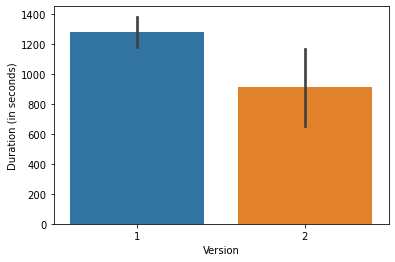

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="Version", y="Duration (in seconds)", data = merged_df, estimator = np.mean)

### We took a total of time taken by responders for each Version and as a result, more time was taken in the Version 1. At the same time, this is small database. So, it is diffcult to come up with a conclusion.

In [33]:
# we will considered the page submit as the time taken to complete one question.
#Get the label of columns which starts with "Q"

# Put this is a separate python file 
# This will work on both section

# V2
colRemove = ["First", "Last", "Click"]
question = [col for col in df1 if col.startswith('Q')]
# not clean, come up with different way
question = [col for col in question if "First" not in col]
question = [col for col in question if "Last" not in col]
question = [col for col in question if "Click" not in col]
question = [col for col in question if "Page" not in col]
question = df1[question]
# Dropping Q33 and Q34 as they are preference question
question = question.drop(labels=["Q33", "Q34"], axis=1)
# Reindex this
#display(question)

# To get the index of the a column
#index_no = question.columns.get_loc("Q2")
#print(index_no)

# Section 1 Version 2

In [35]:
# CSV containing correct answer
correct = pd.read_csv("../report/answer/S1V2.csv", delimiter= ";")
accurayR1 = []
accurayR2 = []
for i in range(len(correct.loc[0])):
    if question.loc[2][i] == correct.loc[0][i]:
        accurayR1.append(1)
    else:
        accurayR1.append(0)
    if question.loc[3][i] == correct.loc[0][i]:
        accurayR2.append(1)
    else:
        accurayR2.append(0)
        
r1 = pd.DataFrame(accurayR1)
r2 = pd.DataFrame(accurayR2)
numCorAnsR1 = r1[r1[0] == 1]
numCorAnsR2 = r2[r2[0] == 1]
perR1 = (len(numCorAnsR1)/32)*100
perR2 = (len(numCorAnsR2)/32)*100
print(f"The Responder 2 has {len(numCorAnsR1)} correct answer")
print(f"The Responder 2 has {perR1}% accuray")
print(f"The Responder 3 has {len(numCorAnsR2)} correct answer")
print(f"The Responder 3 has {perR2}% accuray")
# make a table for accuaray and correct answer

The Responder 2 has 20 correct answer
The Responder 2 has 62.5% accuray
The Responder 3 has 23 correct answer
The Responder 3 has 71.875% accuray


The Responder 2 has the most number of correct answer

## This will compare with Section 1 Version 1 to Find out which version yield better ratio.

## This is our plan on what to calculate and add into our report

1. Calculate the average time taken per question
2. Calculate the average time taken for each block (i.e "Basic Interpretation" , "Comparing team set")
      - On which block has most of correct answer?
      - Expecting the block 2/Part 2 ("Move a student") to have least correct answer
      - I think in compare to section 2 (time) Part 2 ("Move a student"), Section 2 Part 2 will have more correct answer
3. (Average total time) Time per person, per version, per entire survey and same for accuracy
      - Does counterbalancing actually affect the final outcome?

Counterbalancing is added to adjust the fairness but it would interesting to see if it affect timing and accuracy. Interestingly we have also recorded the number of clicks taken by the responders. If time allows, we will also explore the click rate per question. This will allow us to answer how a user is unsure about their answer/ how many times they changed their answer.

## General Feedback and Suggested Improvement


### Section 1 V1 & V2

- Move a student Q26 for V1 and Q10 for V2 is the same graph as Q25 and Q9. (Need a fix!)
- Too many graphs!
- We can add Q1_Timer for Timer in Qualtrics. Make it easier to analyze the data

### Section 2 V1, V2 & V3

- Too many graphs!
- Why use Tally? It is the worst one!
- If there is a better way to present tally, it would be great!
- Part 3 graphs ("comparing Team Set") are diffcult to see when the responders has a smaller screen. (i.e 13 inchs)
- Figure out who to move in heat map (ishika)